In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive/MyDrive/Colab\ Notebooks/scripts

/content/drive/MyDrive/Colab Notebooks/scripts


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import os
from collections import Counter
from imblearn.over_sampling import SMOTE

from NonLinCFA import NonLinCFA
from aux_NonLinCFA import *

In [4]:
cd ..

/content/drive/MyDrive/Colab Notebooks


In [5]:
features = ['cyclostationary_mean_tg', 'cyclostationary_mean_tg_1w', 'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
                                                                            'cyclostationary_mean_tg_12w',
                                                                            'cyclostationary_mean_tg_16w',
                                                                            'cyclostationary_mean_tg_24w',
                                                                            'cyclostationary_mean_rr',
                                                                            'cyclostationary_mean_rr_1w',
                                                                            'cyclostationary_mean_rr_4w',
                                                                            'cyclostationary_mean_rr_8w',
                                                                            'cyclostationary_mean_rr_12w',
                                                                            'cyclostationary_mean_rr_16w',
                                                                            'cyclostationary_mean_rr_24w']

In [6]:
def plot_cells(output, selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5, sample=0, starting_point=[0,0]):
  x = []
  y = []
  fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(9, 9), constrained_layout=True)
  # fig.suptitle(basin + ' shuffle num. ' + str(sample) + ' standardized target, no moving avg', fontsize=12)
  fig.suptitle(basin + ' internal ordering CMI best 5', fontsize=12)
  for j in range(0, 2):
    for i in range(0,5):
      ax[i][j].set_xlim(xmin,xmax)
      ax[i][j].set_ylim(ymin,ymax)

  cmap = plt.get_cmap('rainbow')
  selected_colnames_nocoord = [feature.rsplit('_', 1)[0] for feature in selected_colnames]

  for i in range(len(selected_colnames)):
    # iterate over all the features aggregations
    for k in range (len(output)):

      # print only the aggregations of the chosen features
      #if output[k][0][0].split('_')[0].replace("-", "_" ) == selected_colnames_nocoord[i]:
      if features[k] == selected_colnames_nocoord[i]:
        #print ("Found feature ", selected_colnames_nocoord[i])

        for j in range (len(output[k])):       # j iterates all the clusters
          #colors = cm.rainbow(np.linspace(0,1,len(output[k])))
          #np.random.shuffle(cm)
          x = []
          y = []
          for datum in output[k][j]:
              x.append(float(datum.split('_')[1]))
              #print(float(datum.split('_')[1]))
              y.append(float(datum.split('_')[2]))
              #print(float(datum.split('_')[2]))

          ax[i][0].scatter(x,y,color=cmap(1.*j/len(output[k]))) # ax[i][0].scatter(x,y,color=colors[j])
          ax[i][0].scatter(float(starting_point[0]), float(starting_point[1]), facecolors='none', edgecolors='r')
          ax[i][0].set_title(selected_colnames_nocoord[i] + '_all_aggreg', fontsize = 9)

  #col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
  for i in range(len(selected_colnames)):
    for k in range(0, len(output)):
      if features[k] == selected_colnames_nocoord[i]:
      # if output[k][0][0].split('_')[0].replace("-", "_" ) == selected_colnames_nocoord[i]:
        # print ("Found feature ", output[k][0][0].split('_')[0].replace("-", "_" ))
        x = []
        y = []
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[k][idx]:
          x.append(float(datum.split('_')[1]))
          y.append(float(datum.split('_')[2]))
        ax[i][1].scatter(x,y,color=cmap(1.*i/len(selected_colnames)))
        ax[i][1].set_title(selected_colnames_nocoord[i] + '_chosen_aggreg', fontsize = 9)

# Standardized target aggregations (no shuffle, no ma2)

In [13]:
plots_folder = './NonLinCFA/for_plots/internal_ordering/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

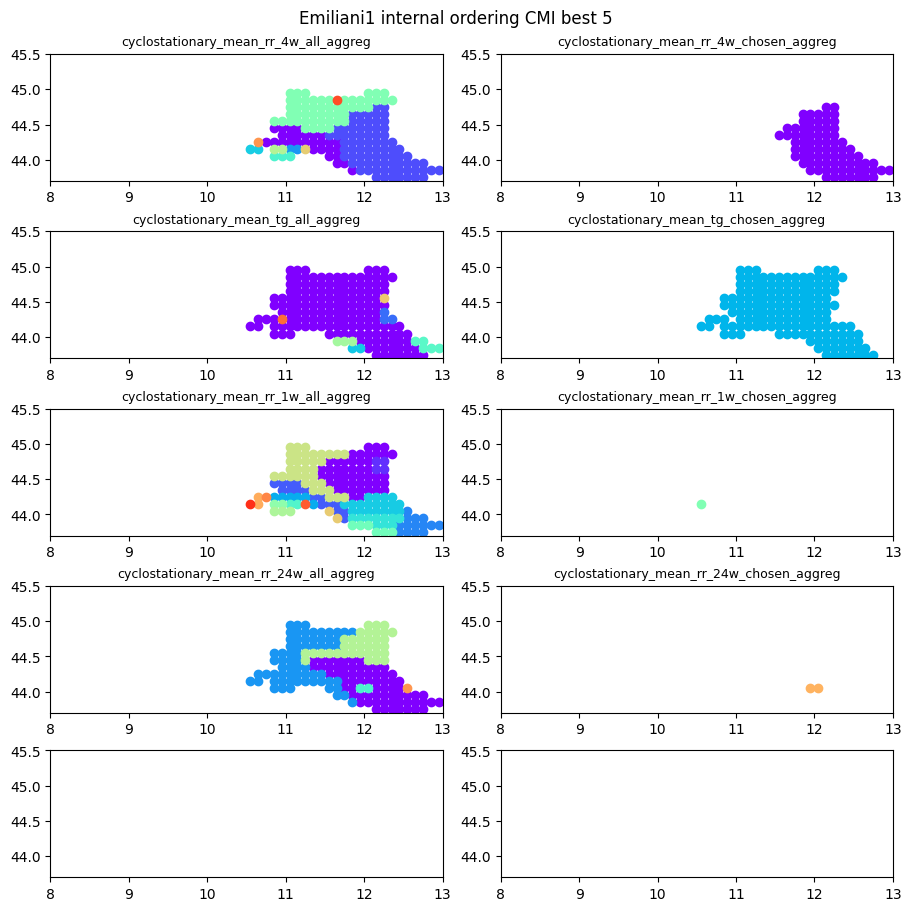

In [14]:
plot_cells(outputs, selected_colnames_CMI5, xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=1)

In [ ]:
plots_folder = './NonLinCFA/for_plots/no_shuffle/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

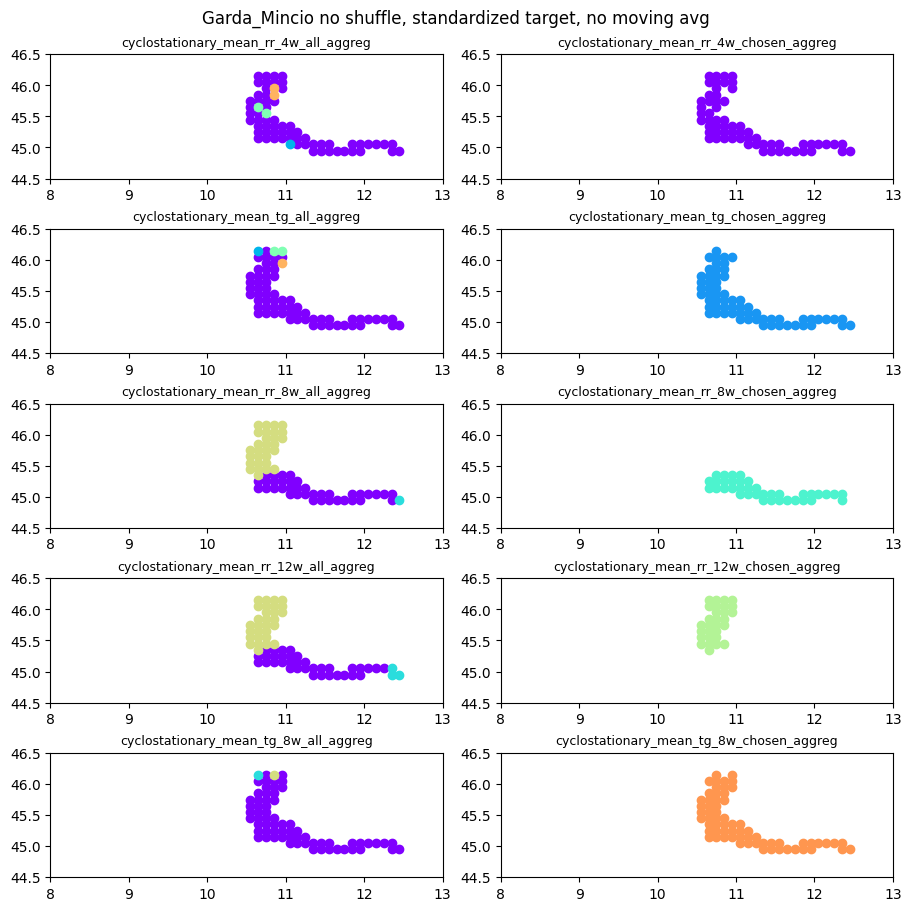

In [ ]:
plot_cells(outputs[0],selected_colnames_CMI5[0], xmin=8, xmax=13, ymin=44.5, ymax=46.5, sample=1)

# Standardized target aggregations (no ma2)

In [ ]:
plots_folder = './NonLinCFA/for_plots/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

In [ ]:
starting_points = np.load(plots_folder + basin + 'starting_points.npy', allow_pickle=True)

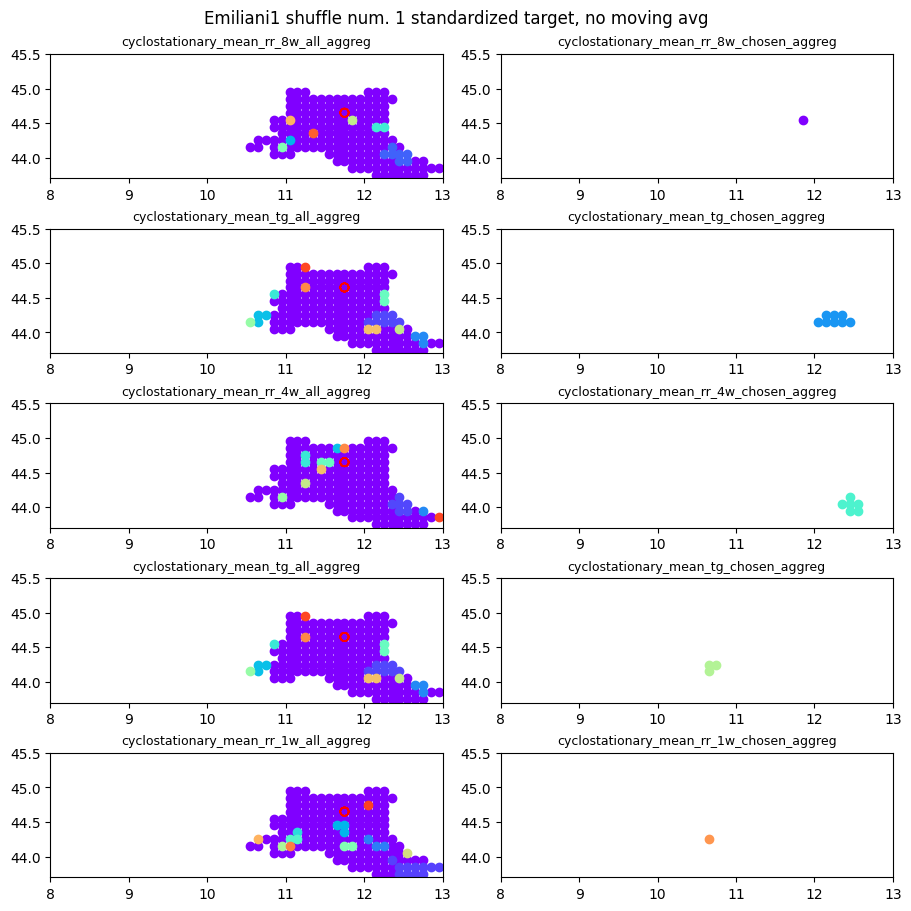

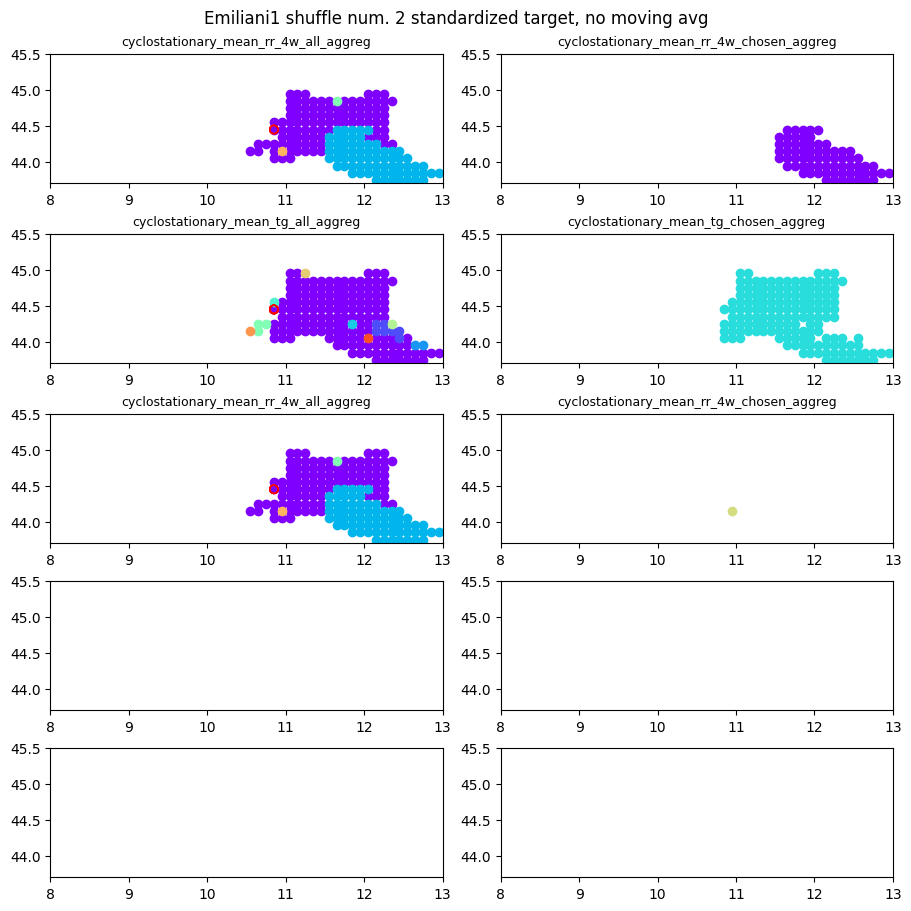

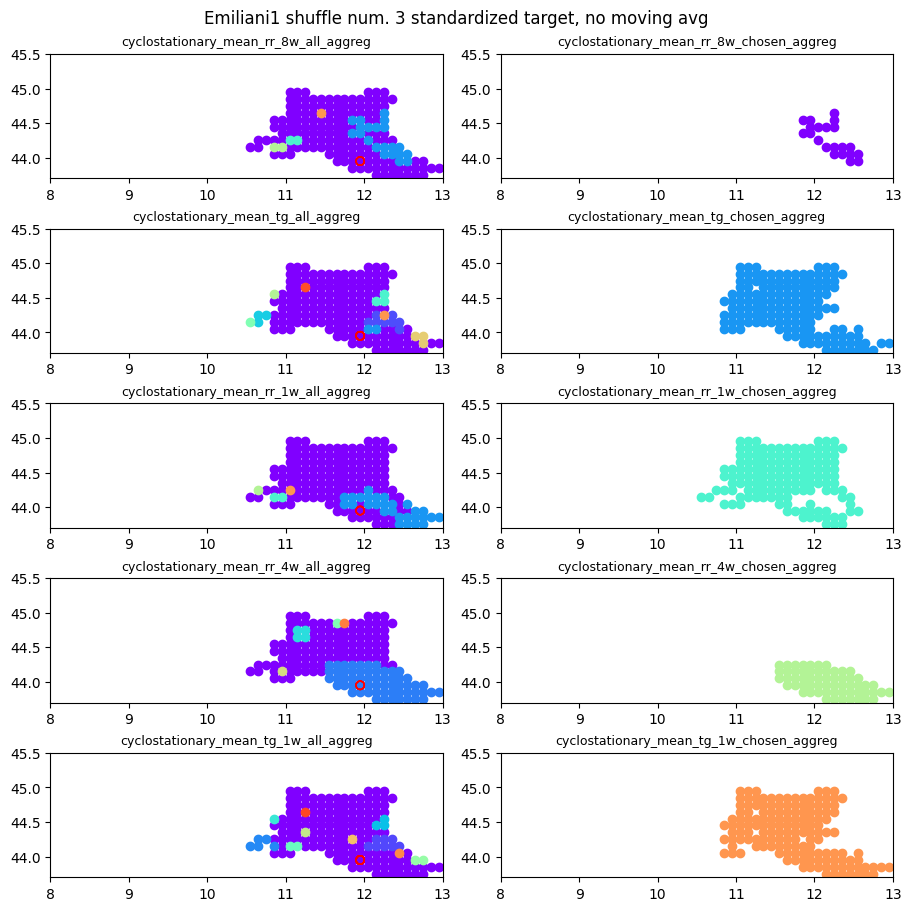

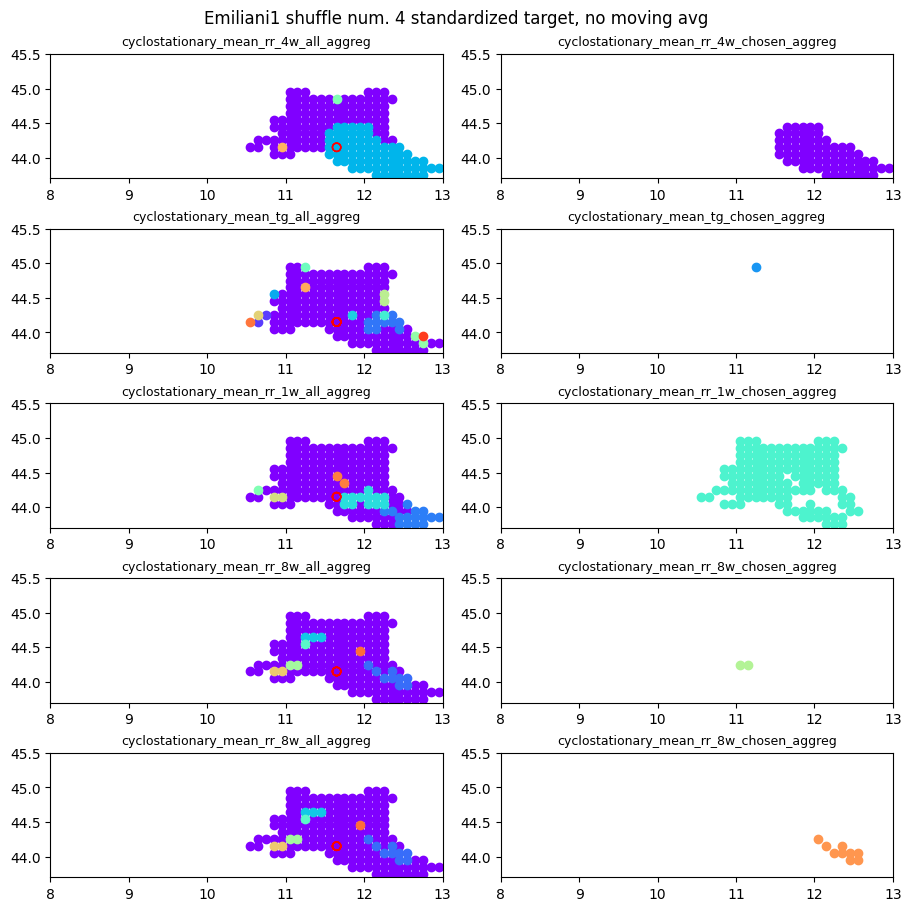

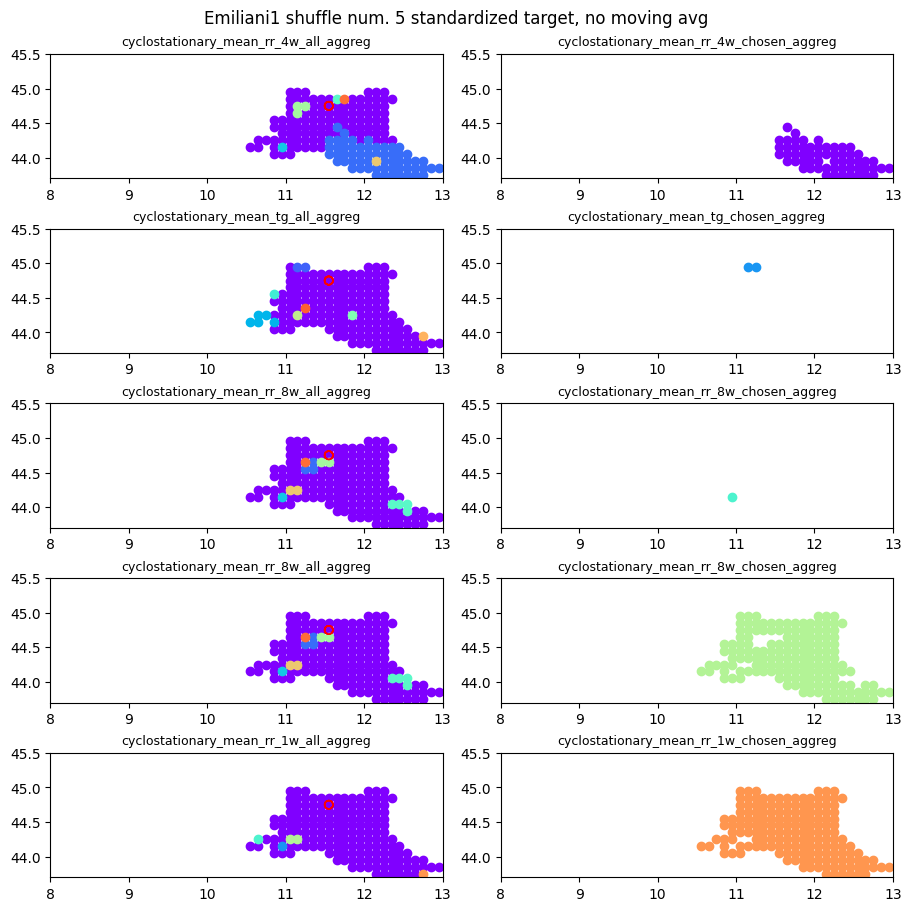

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1, starting_point = starting_points[i])

In [ ]:
plots_folder = './NonLinCFA/for_plots/'
basin = "Emiliani2"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

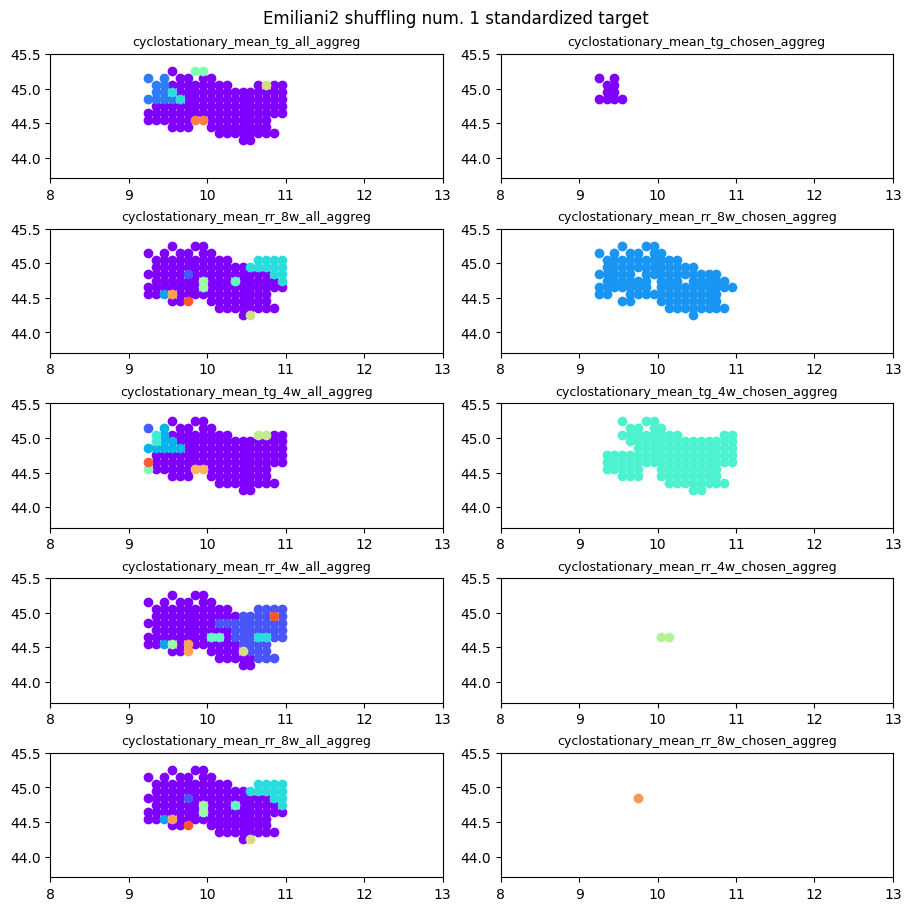

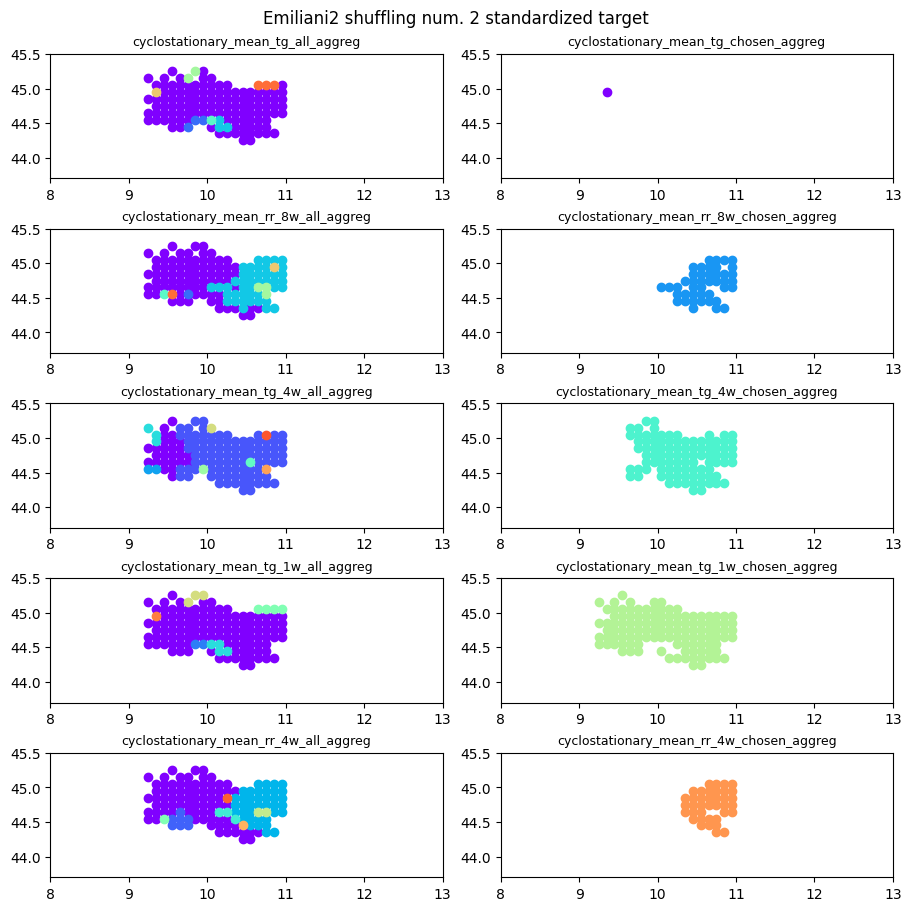

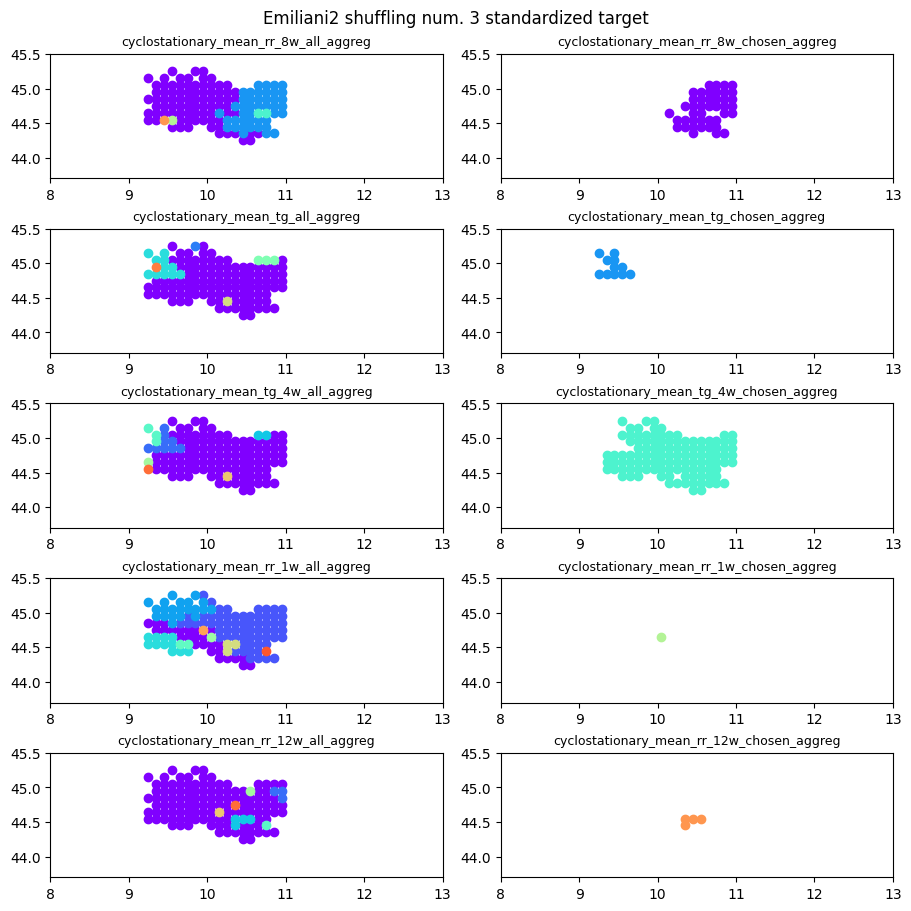

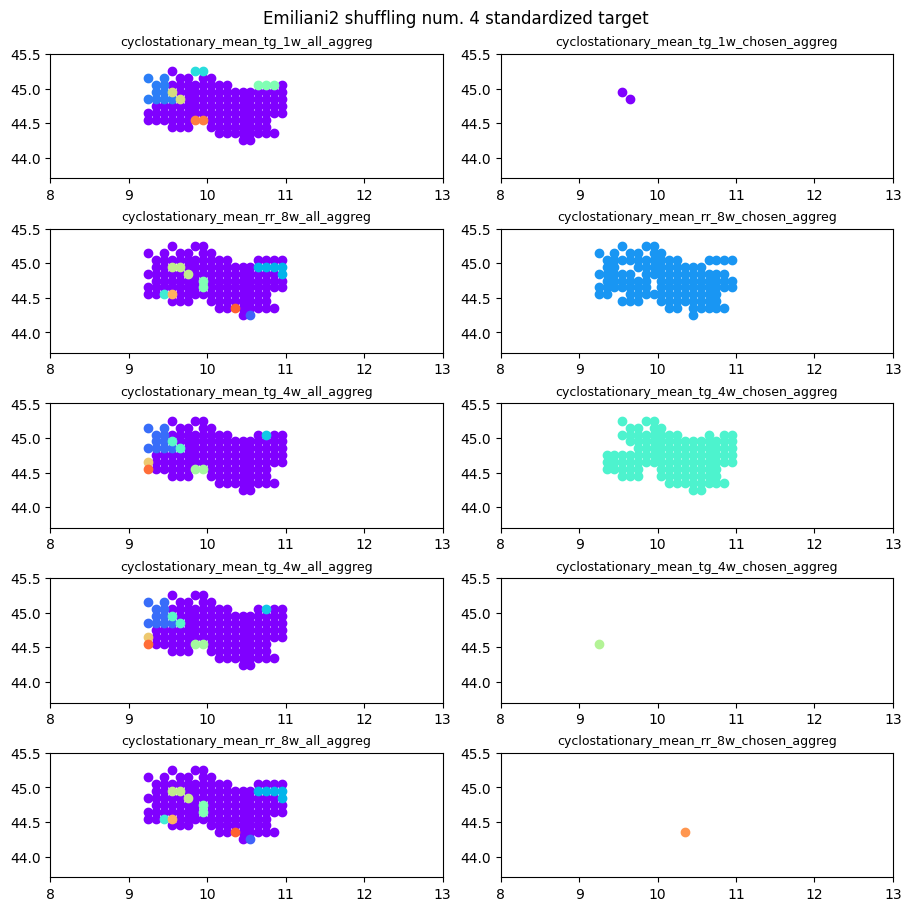

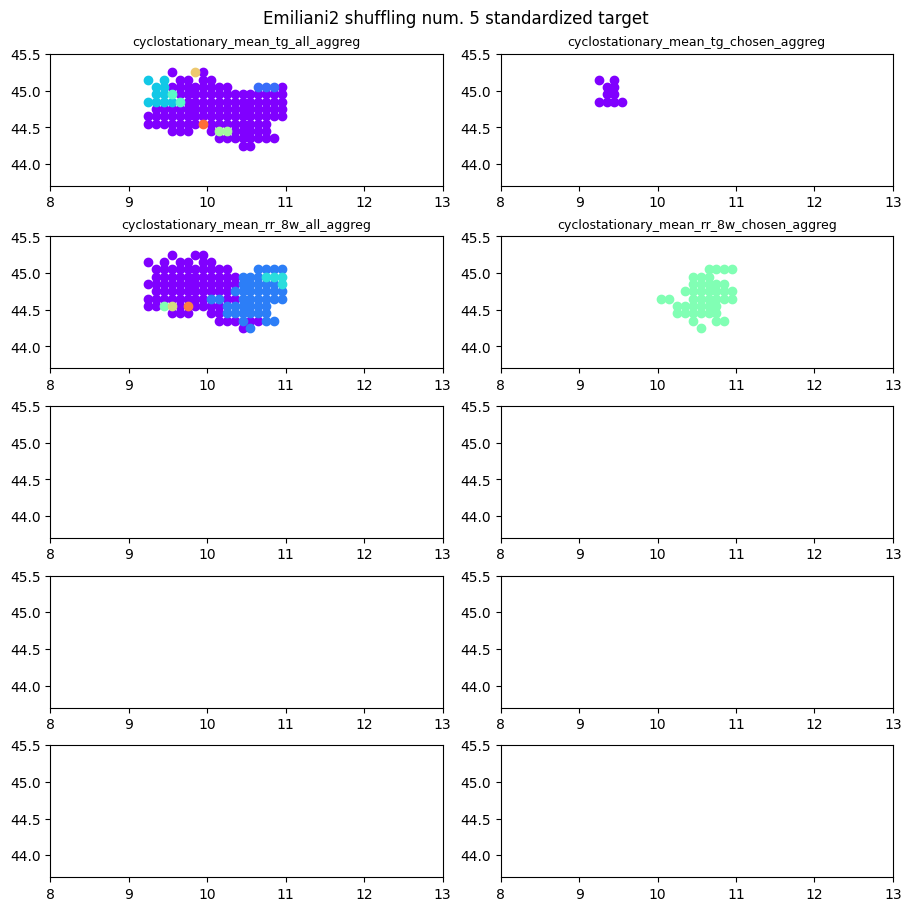

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './NonLinCFA/for_plots/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

In [ ]:
starting_points = np.load(plots_folder + basin + 'starting_points.npy', allow_pickle=True)

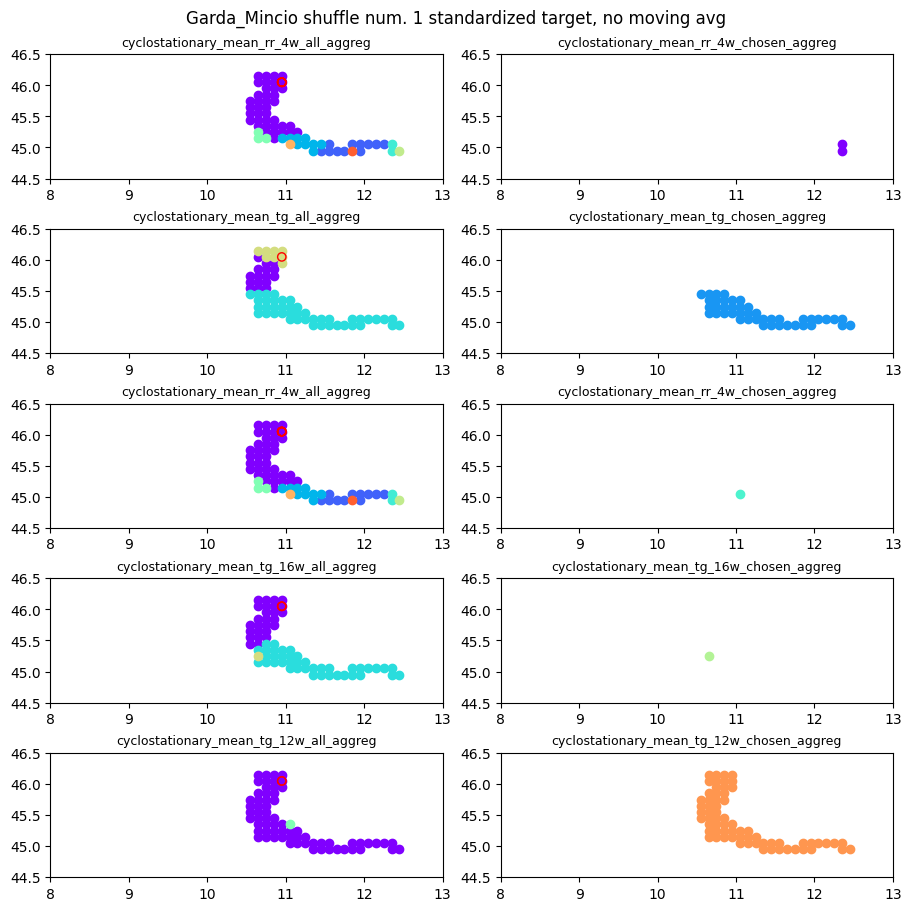

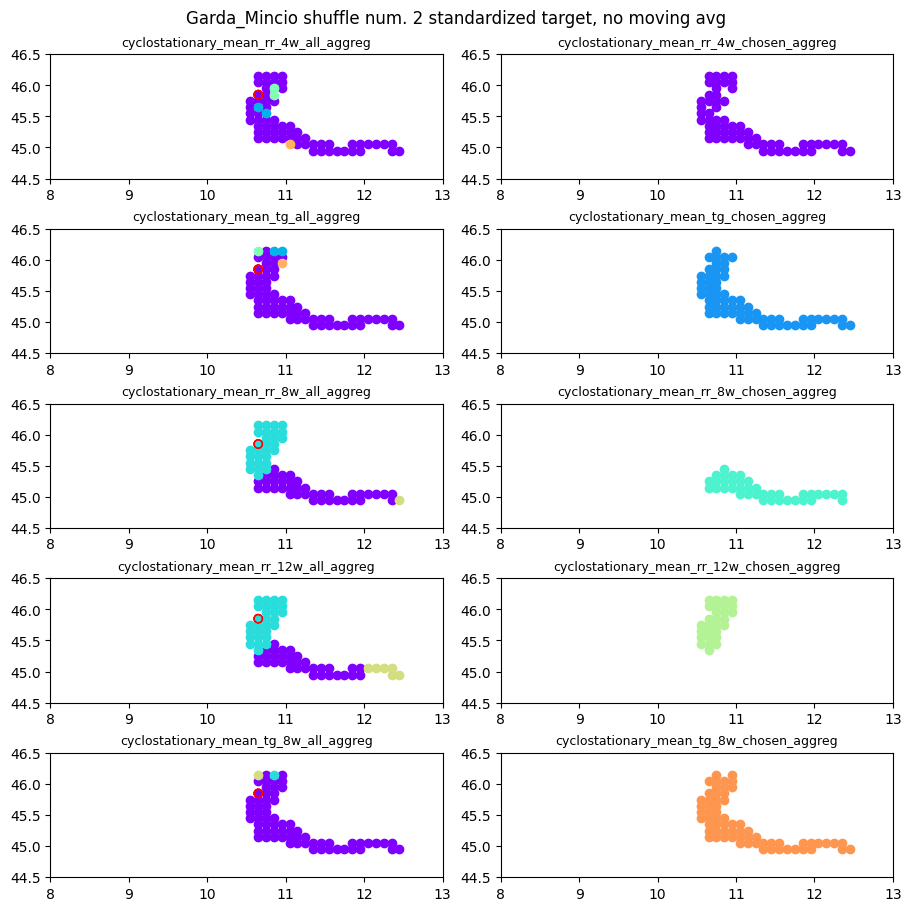

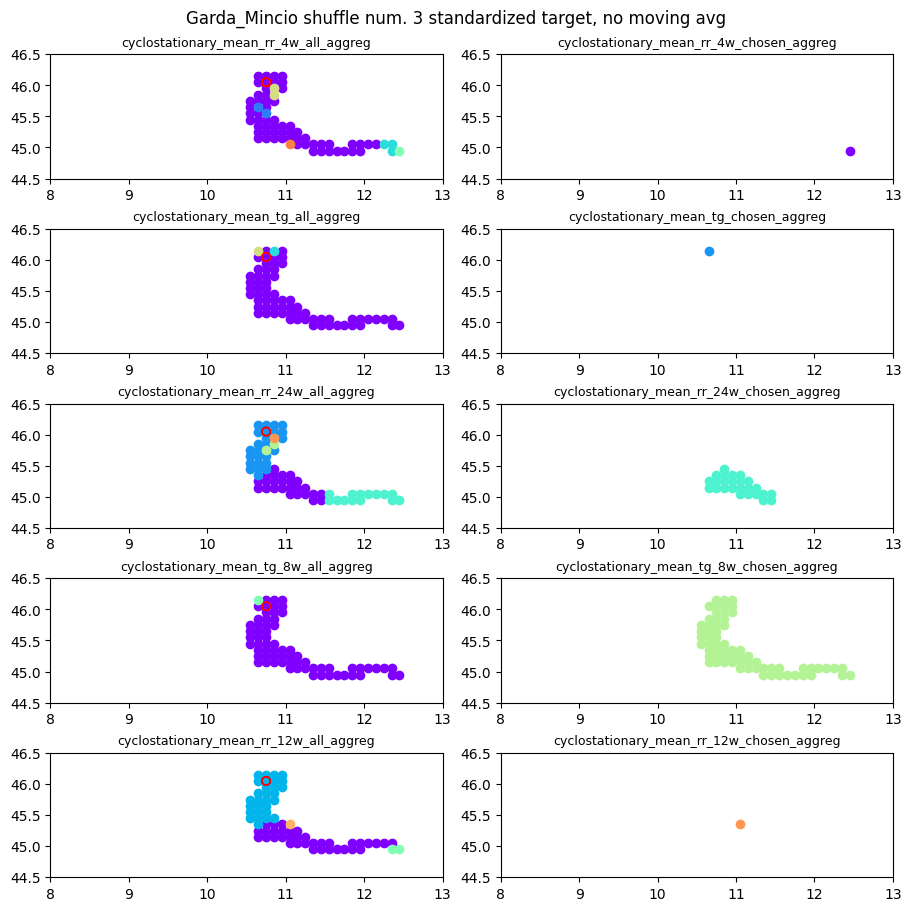

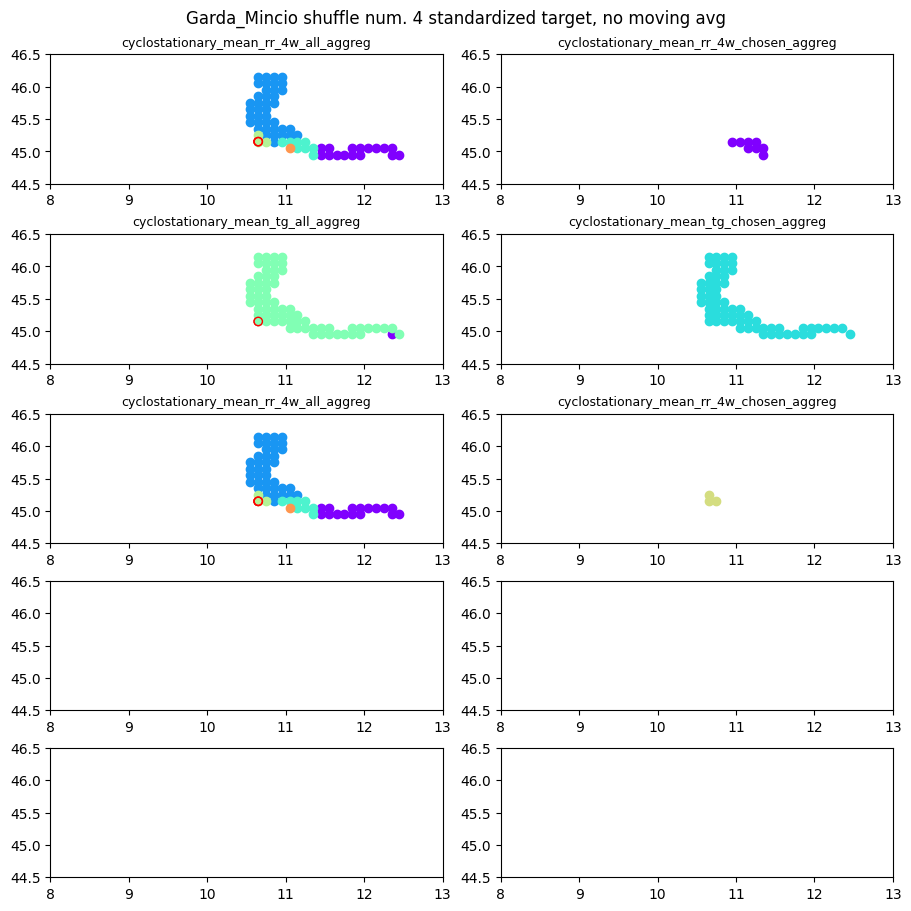

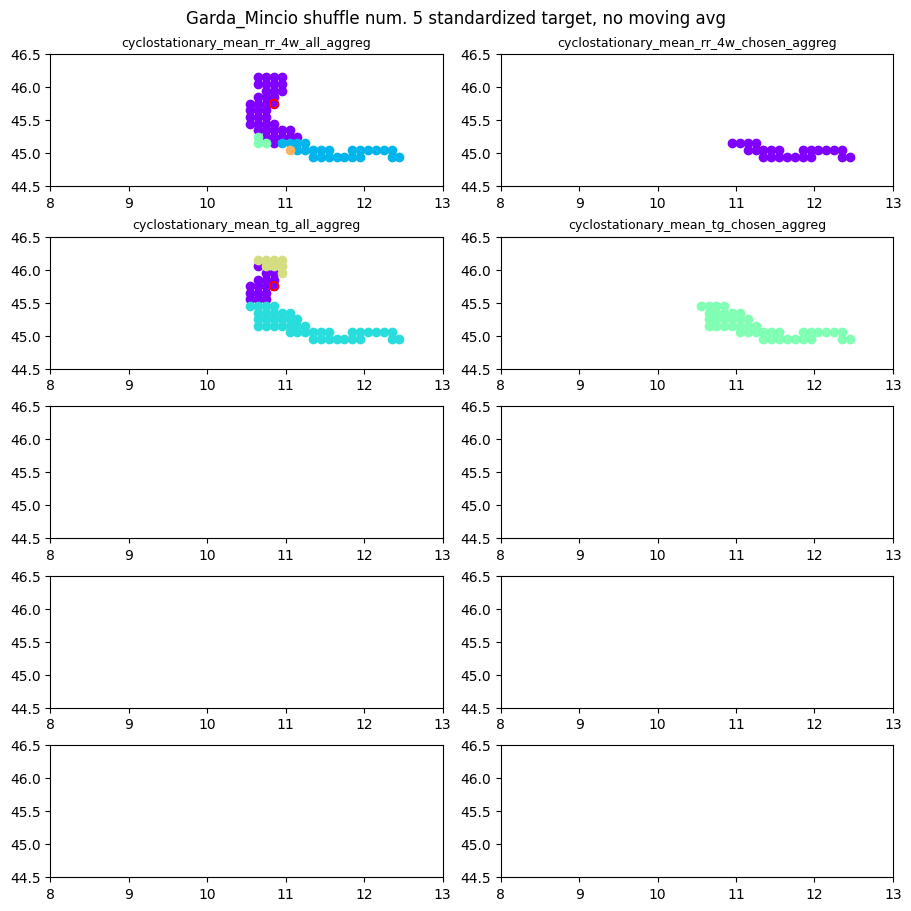

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=44.5, ymax=46.5, sample=i+1, starting_point = starting_points[i])

# Standardized target aggregations ma2

In [ ]:
plots_folder = './NonLinCFA/for_plots_moving_avg_2/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

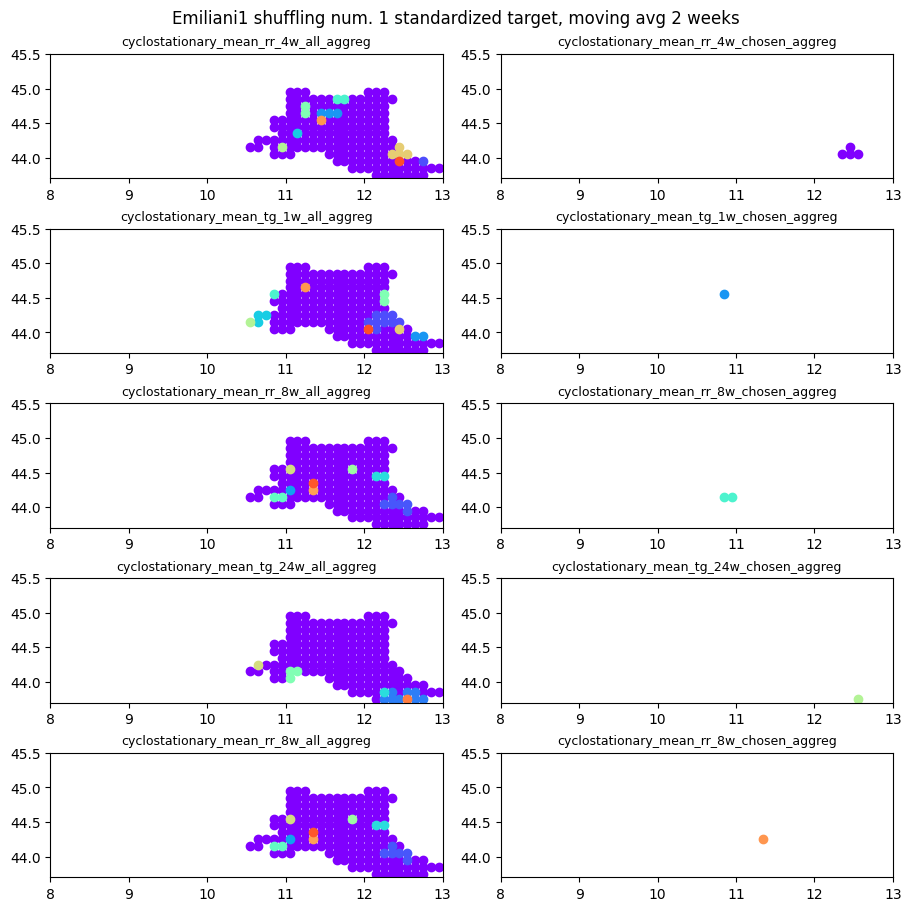

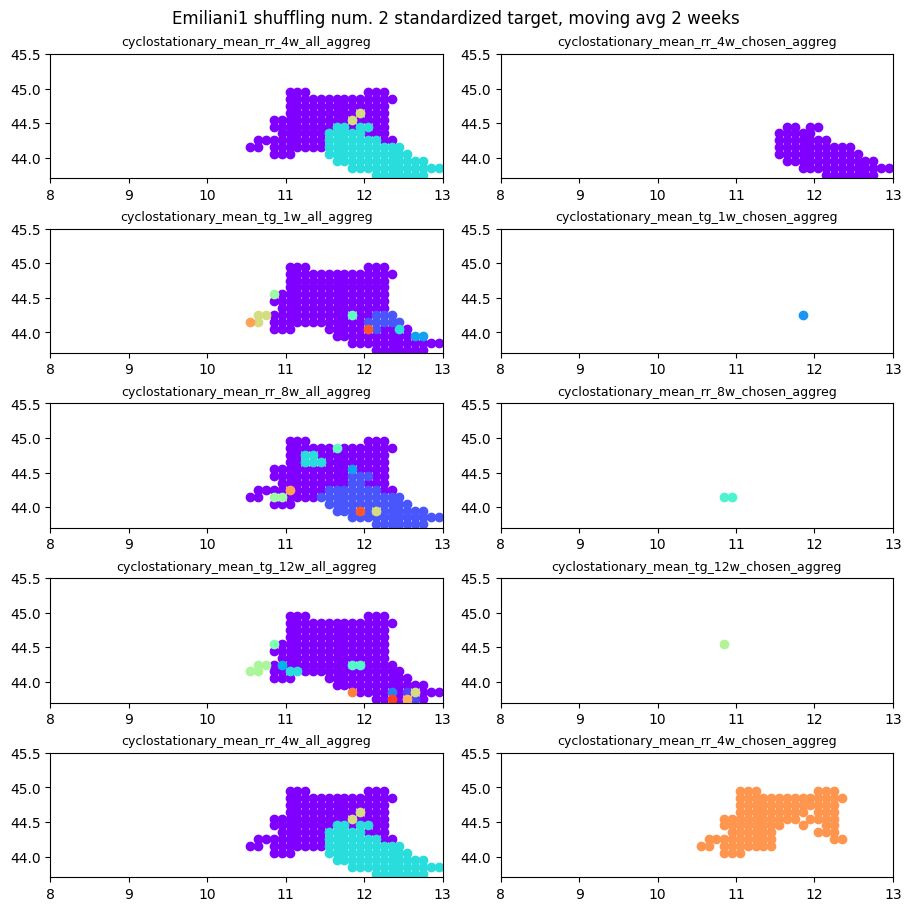

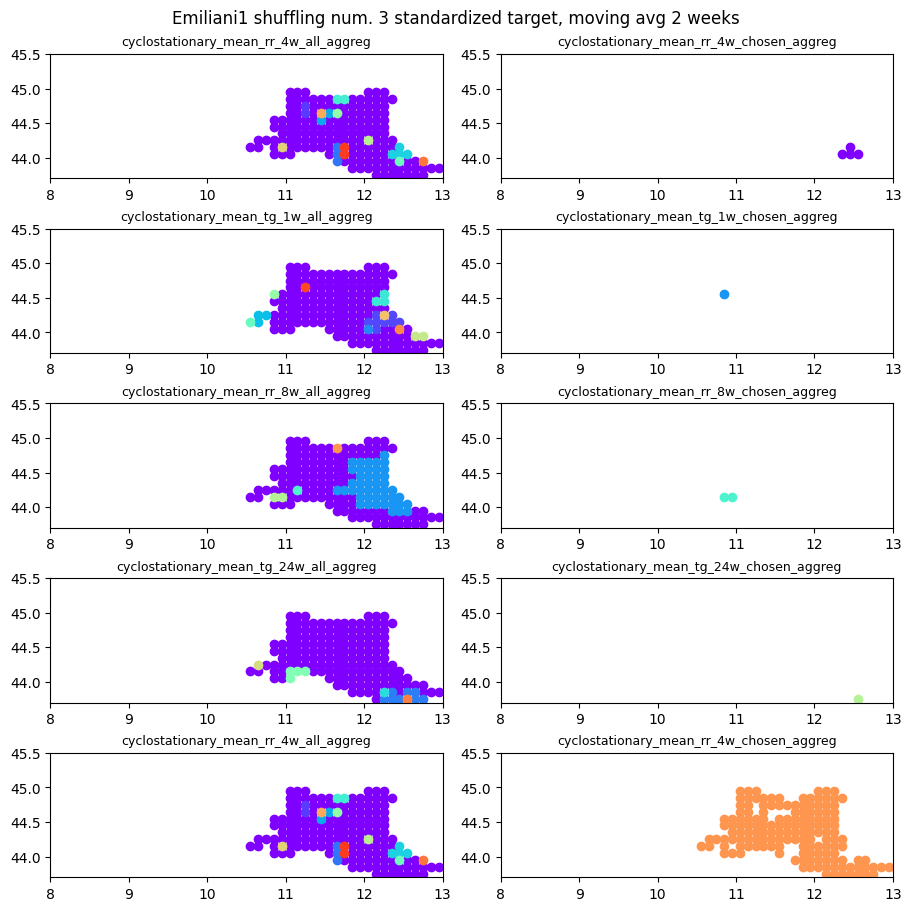

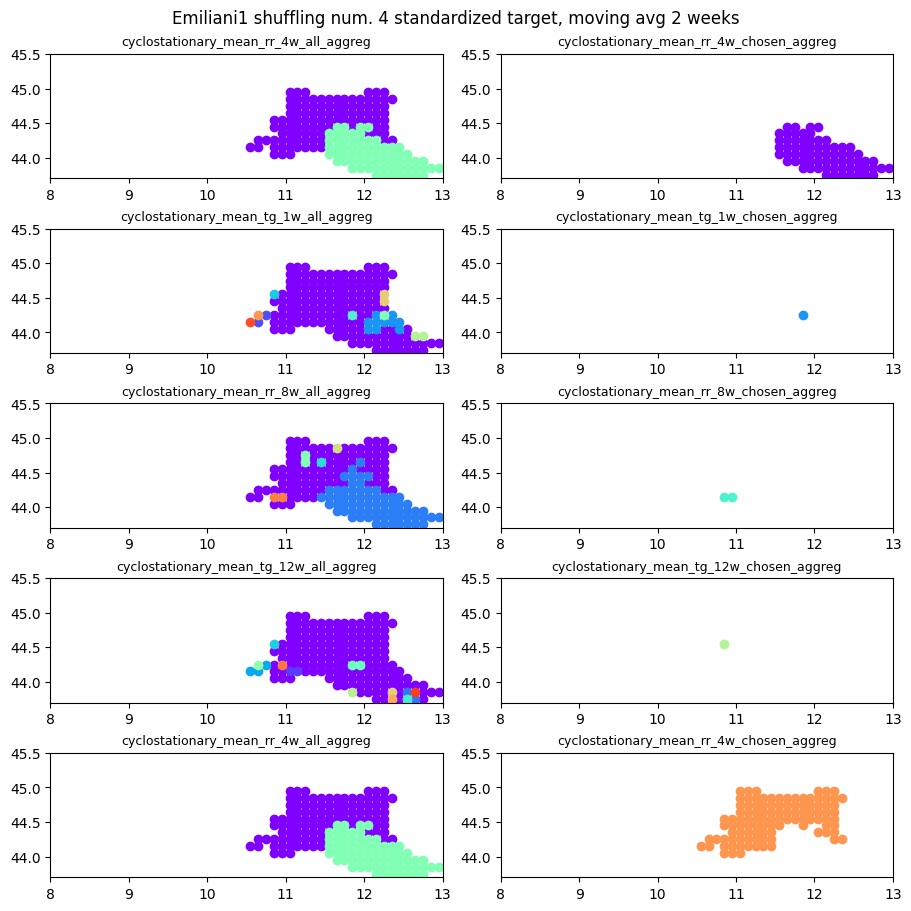

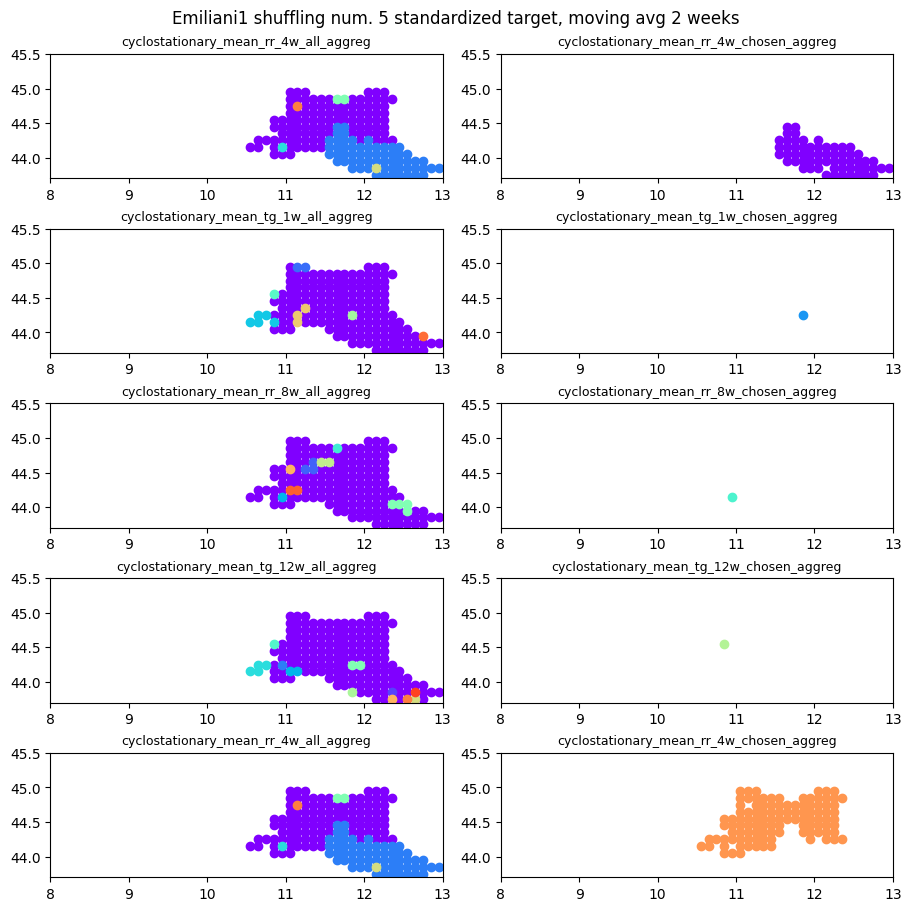

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './NonLinCFA/for_plots_moving_avg_2/'
basin = "Emiliani2"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

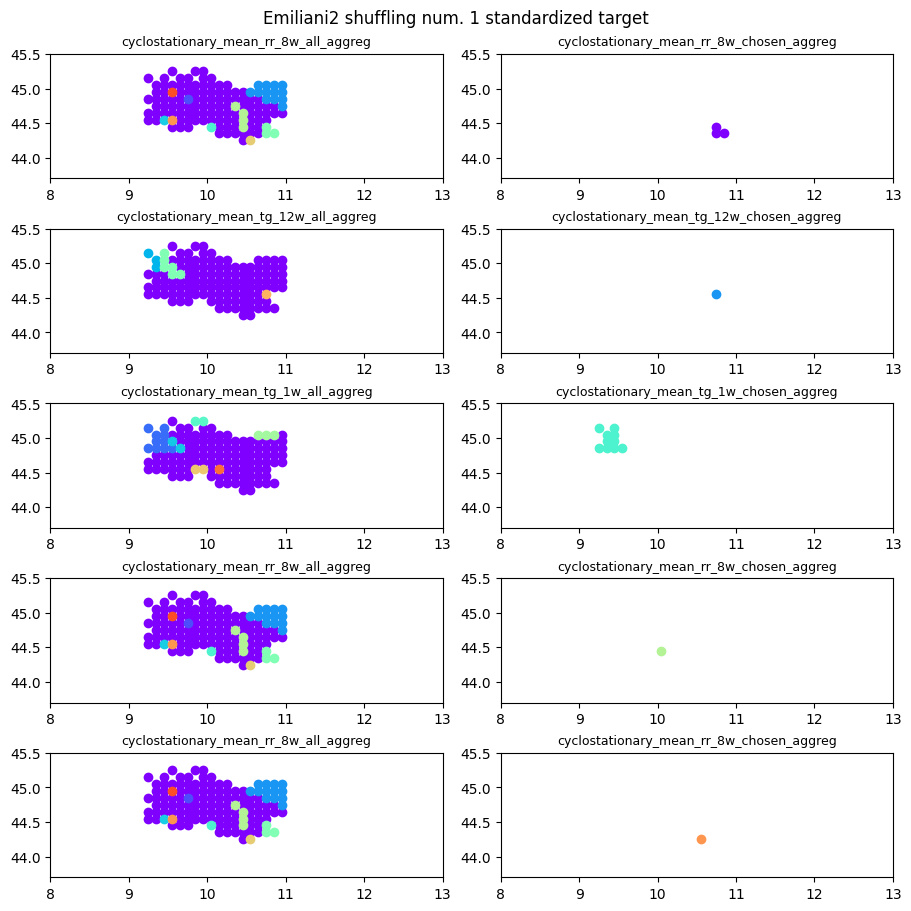

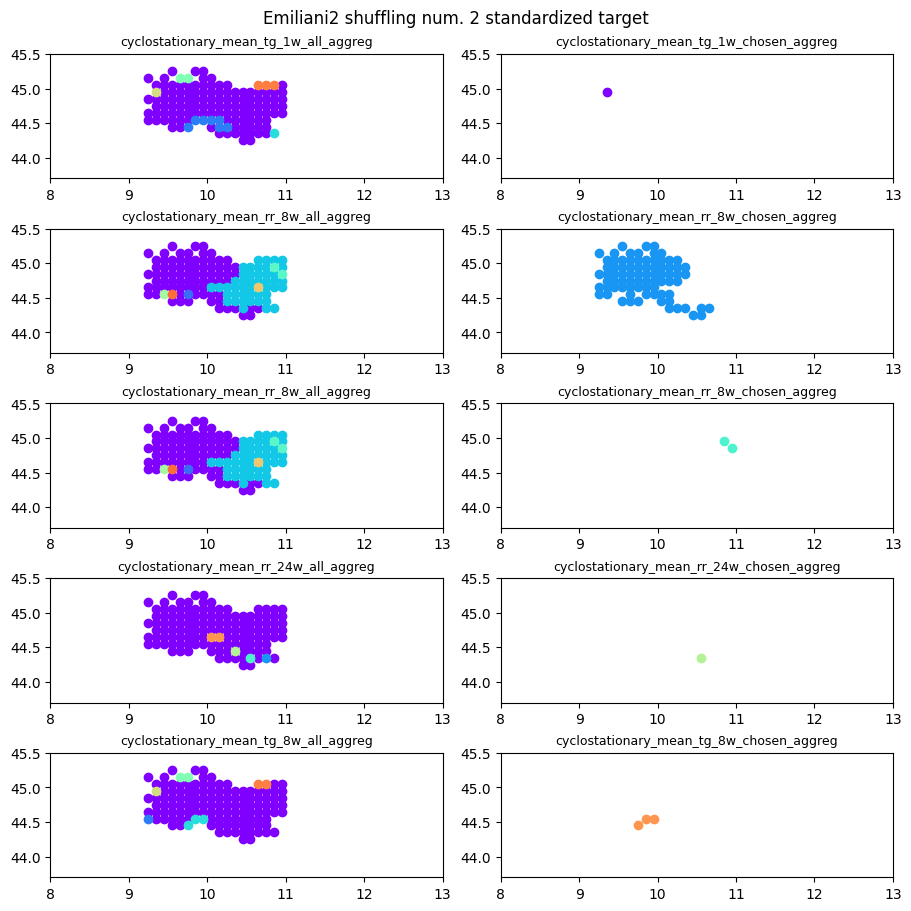

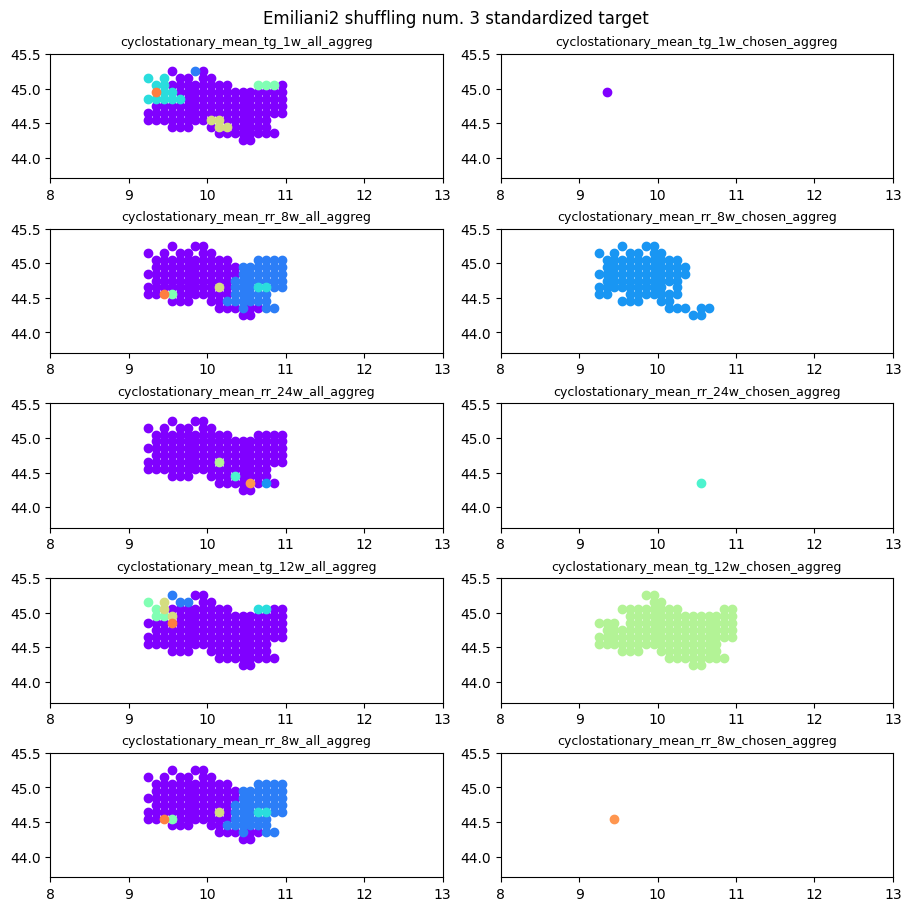

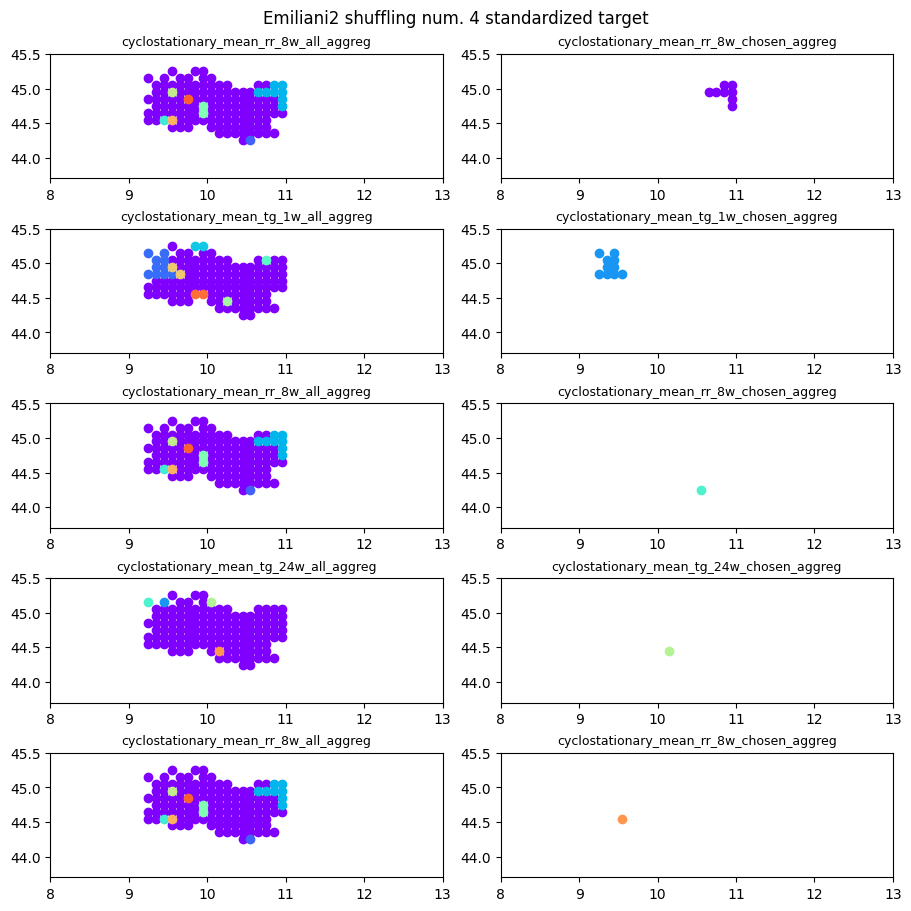

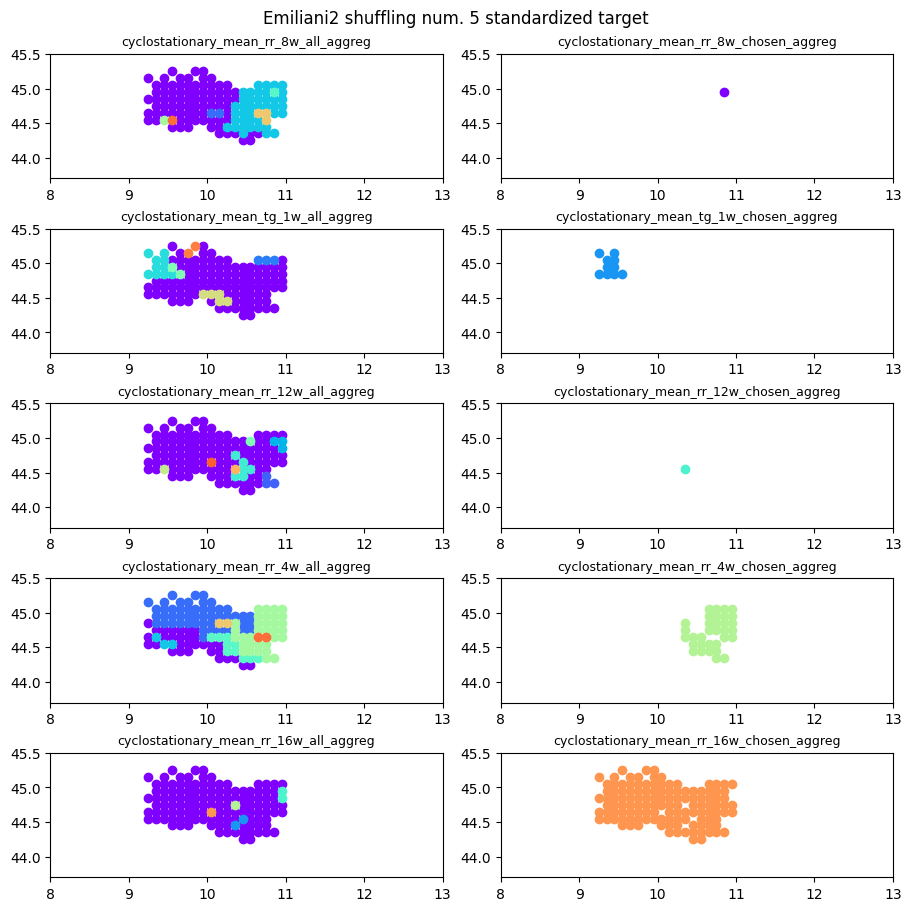

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './NonLinCFA/for_plots_moving_avg_2/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

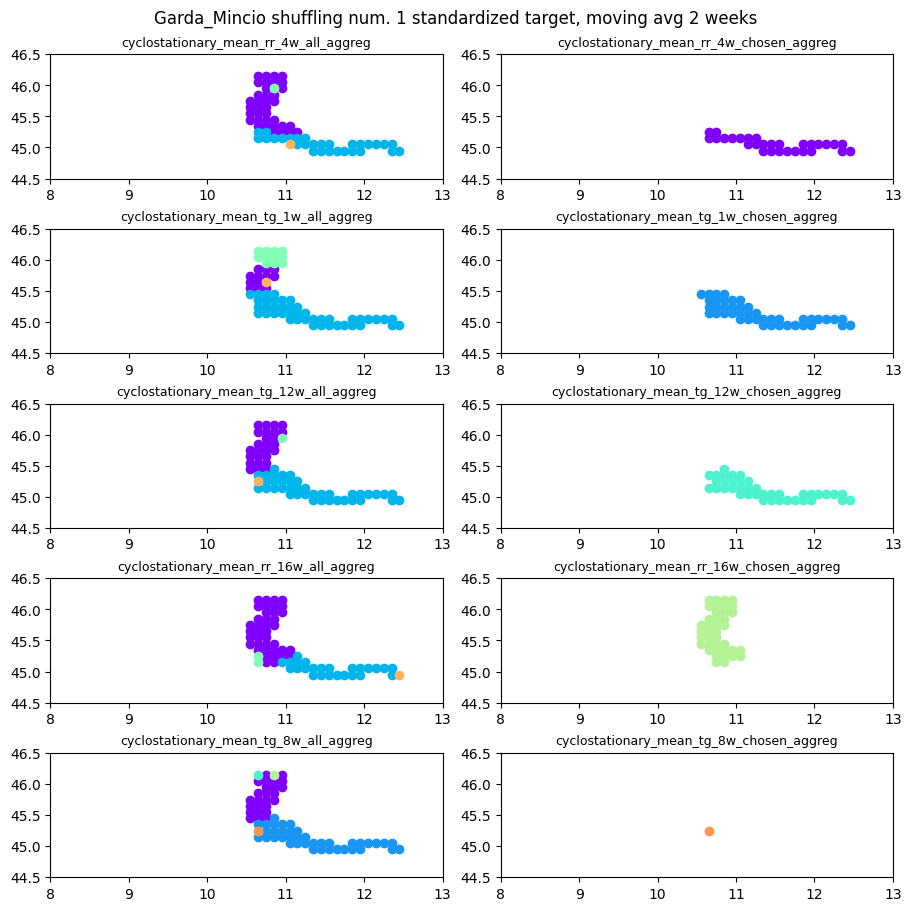

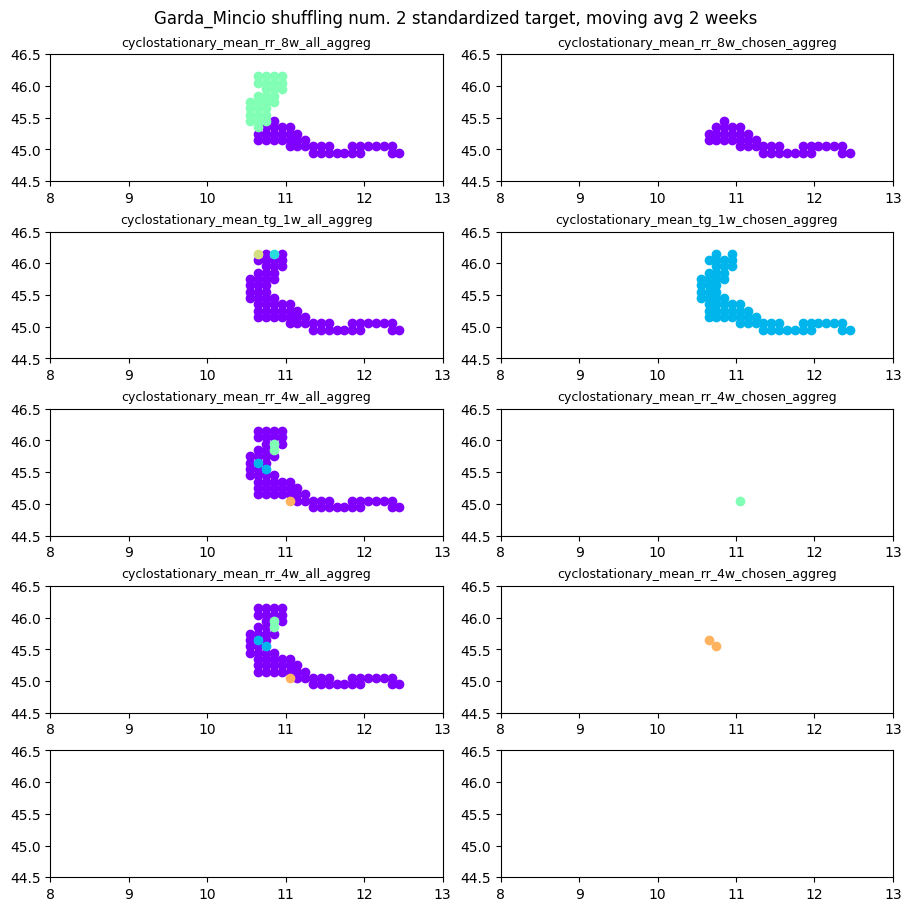

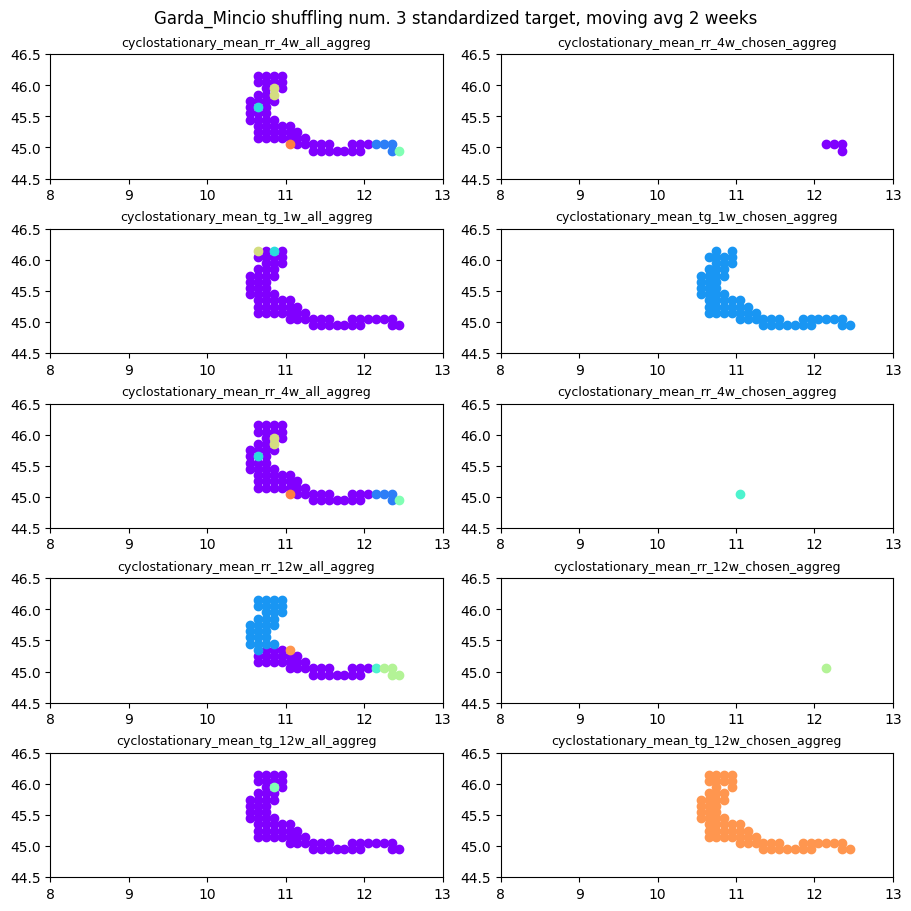

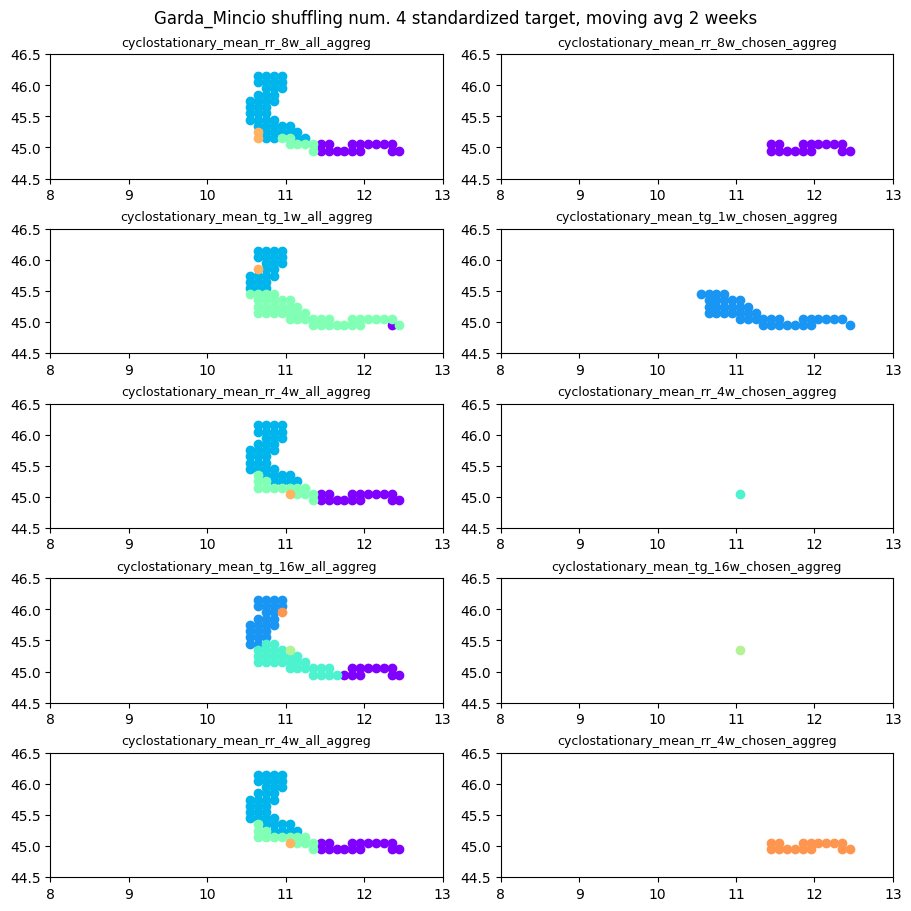

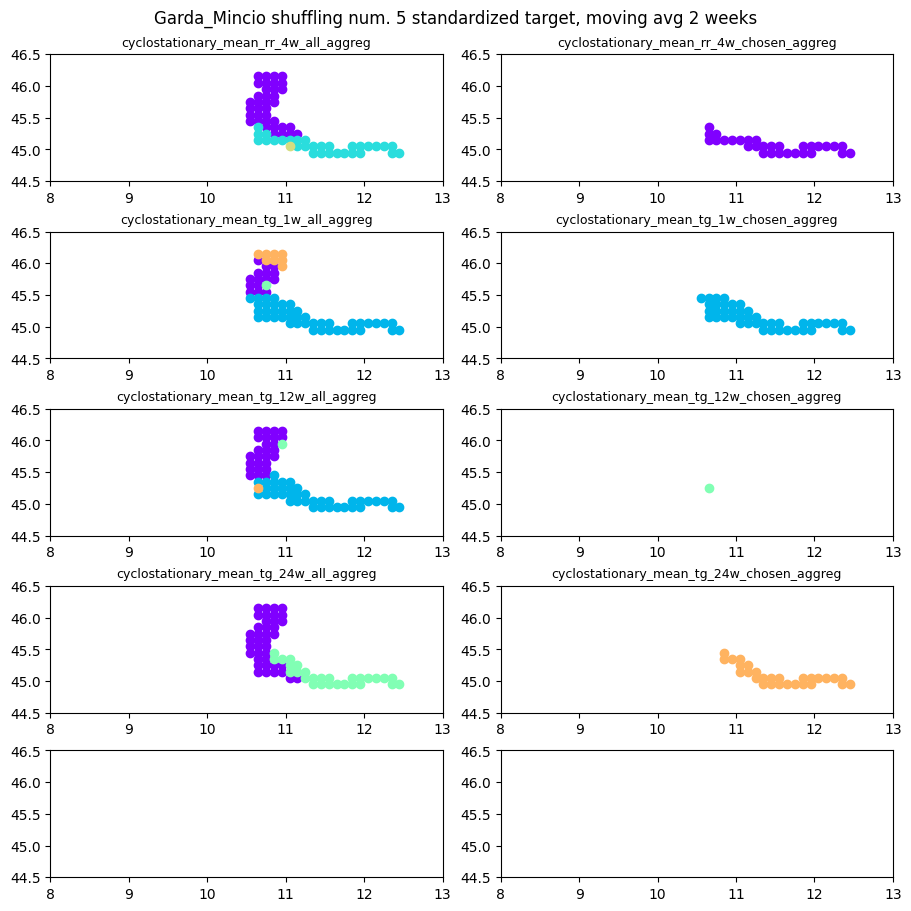

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=44.5, ymax=46.5, sample=i+1)

# Changing aggregations

In [ ]:
### continuous targets
basins = ['Emiliani1','Emiliani2','Garda_Mincio']
path_targets = "./csv/"
targets_df_train = pd.DataFrame()
targets_df_val = pd.DataFrame()
targets_df_test = pd.DataFrame()
targets_df_trainVal = pd.DataFrame()

for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01',
                                                                                     max_test='2020-01-01', path=path_targets+basin+'.csv',
                                                                                     window_size = 1)
    targets_df_train[basin] = target_df_train.mean_std
    targets_df_val[basin] = target_df_val.mean_std
    targets_df_test[basin] = target_df_test.mean_std
    targets_df_trainVal[basin] = target_df_trainVal.mean_std

In [ ]:
def get_features (path_features, basin, train_name, val_name, test_name):
  features_train = pd.read_csv(path_features + basin + train_name)
  features_valid = pd.read_csv(path_features + basin + val_name)
  features_test = pd.read_csv(path_features + basin + test_name)

  features_train_validation = pd.concat([features_train, features_valid])
  return features_train.values, features_valid.values, features_train_validation.values, features_test.values

In [ ]:
basin = 'Emiliani1'

### CMI best5 features
path_features = './NonLinCFA/temp_prec_shuffle/'

X_train_CMI5 = pd.read_csv(path_features + basin + '_4_nonLinCFA_best5_CMI_train.csv')
X_validation_CMI5 = pd.read_csv(path_features + basin + '_4_nonLinCFA_best5_CMI_val.csv')
X_test_CMI5 = pd.read_csv(path_features + basin + '_4_nonLinCFA_best5_CMI_test.csv')
X_train_validation_CMI5 = pd.concat([X_train_CMI5, X_validation_CMI5])

In [ ]:
X_train_validation_CMI5

,cyclostationary_mean_rr_4w_1,cyclostationary_mean_tg_1,cyclostationary_mean_rr_8w_2,cyclostationary_mean_rr_8w_0,cyclostationary_mean_rr_1w_0
0,2.960781,0.268224,3.477079,2.579888,1.376986
1,1.761314,0.977612,1.971154,1.727977,0.932512
2,1.501844,-0.780151,1.507829,1.440414,0.467200
3,0.949124,0.408553,1.922434,1.062690,0.195680
4,2.038458,-0.260577,1.545904,1.789565,1.256116
...,...,...,...,...,...
223,-0.414331,0.624547,0.533995,-0.337222,0.314153
224,-0.201495,1.691934,-0.134802,-0.601620,0.142872
225,0.764394,1.924323,-0.093084,-0.127706,0.394455
226,0.453412,1.546077,-0.282011,-0.131746,0.408409


In [ ]:
basin = 'Garda_Mincio'
plots_folder = './NonLinCFA/for_plots/'
train_val_features = pd.read_csv(plots_folder + basin + '_trainVal_aggreg_4')
test_features = pd.read_csv(plots_folder + basin + '_test_aggreg_4')

In [ ]:
outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)

In [ ]:
outputs[4][0]

In [ ]:
X_train_validation_CMI5['cyclostationary_mean_rr_1w_0'] = train_val_features['cyclostationary_mean_tg_1w_0']
X_test_CMI5['cyclostationary_mean_rr_1w_0'] = test_features['cyclostationary_mean_tg_1w_0']

In [ ]:
lin_regr = LinearRegression()

# CMI best 5
lin_regr.fit(X_train_validation_CMI5, targets_df_trainVal[basin])
print("Train accuracy logistic regression CMI best 5: ", round(lin_regr.score(X_train_validation_CMI5, targets_df_trainVal[basin]),3))
print("Test accuracy logistic regression CMI best 5: ", round(lin_regr.score(X_test_CMI5, targets_df_test[basin]),3), "\n")

Train accuracy logistic regression CMI best 5:  0.358
Test accuracy logistic regression CMI best 5:  0.222 

